In [ ]:
import os

#walking throught pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak"):
  print(f"There are {len(dirnames)} files and {len(filenames)} images in '{dirpath}'.")


There are 2 files and 0 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak'.
There are 2 files and 0 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/test'.
There are 0 files and 250 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/test/steak'.
There are 0 files and 250 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/test/pizza'.
There are 2 files and 0 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/train'.
There are 0 files and 750 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


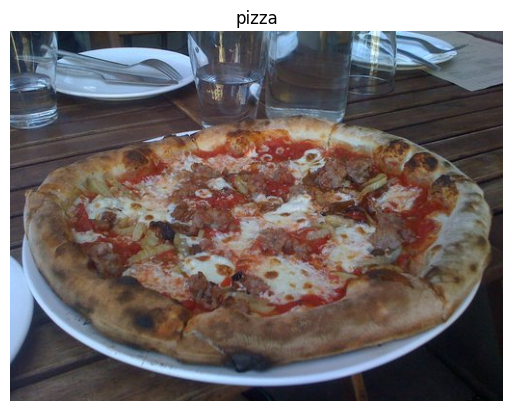

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/train/",
                        target_class="pizza")

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Set the seed
# tf.random.set_seed(42)

# # Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
# train_datagen = ImageDataGenerator(rescale=1./255)
# valid_datagen = ImageDataGenerator(rescale=1./255)
# validation_datagen = ImageDataGenerator(rescale=1./255)

# # Setup the train and test directories
# train_dir = "/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/train/"
# test_dir =  "/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/test/"

# # Import data from directories and turn it into batches
# train_data = train_datagen.flow_from_directory(directory=train_dir,
#                                                batch_size=32,
#                                                target_size=(224, 224),
#                                                class_mode="binary",
#                                                seed=42)
# valid_data = valid_datagen.flow_from_directory(directory=test_dir,
#                                                batch_size=32,
#                                                target_size=(224, 224),
#                                                class_mode="binary",
#                                                seed=42)
# validation_data = validation_datagen.flow_from_directory(directory=test_dir,
#                                                 target_size=(224, 224),
#                                                 batch_size=32,
#                                                 class_mode='binary',
#                                                 seed=42
# )

# # Build a CNN model (same as the Tiny VGG on the CNN explainer website)
# model1 = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(filters=10,
#                          kernel_size=3,
#                          activation="relu",
#                          input_shape=(224, 224, 3)),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# # Compile our CNN
# model1.compile(loss="binary_crossentropy",
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["accuracy"])

# # Fit the model
# for epoch in range(5):
#     validation_x, validation_y = next(iter(validation_data))
#     mod_1 = model1.fit(train_data,
#                             epochs=1,
#                             steps_per_epoch=len(train_data),
#                             validation_data=(validation_x, validation_y))

In [ ]:

import tf_keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tensorflow.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/train/"
test_dir =  "/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/test/"


# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = keras.models.Sequential([
  keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  keras.layers.Conv2D(10, 3, activation="relu"),
  keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  keras.layers.Conv2D(10, 3, activation="relu"),
  keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  keras.layers.MaxPool2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 949s 21s/step - loss: 0.6771 - accuracy: 0.5653 - val_loss: 0.5407 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 12s 262ms/step - loss: 0.5271 - accuracy: 0.7507 - val_loss: 0.4418 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 13s 284ms/step - loss: 0.4644 - accuracy: 0.7920 - val_loss: 0.3718 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 12s 265ms/step - loss: 0.4319 - accuracy: 0.8107 - val_loss: 0.3701 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3681 - accuracy: 0.8473 - val_loss: 0.3524 - val_accuracy: 0.8320


In [ ]:
valid_data